<a href="https://colab.research.google.com/github/akesaverdhen/EDA_Project_22BDS0022/blob/main/22BDS0022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:

# Reg. No.     : 22BDS0022
# Name         : Kesaverdhen A
# Dataset Link : https://raw.githubusercontent.com/salemprakash/EDA/main/Data/indo_rct.csv
# Github Link  : https://github.com/akesaverdhen/EDA_Project_22BDS0022


In [43]:
# 1) Imports & Settings
import warnings, sys
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from mpl_toolkits.mplot3d import Axes3D

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from sklearn.model_selection import train_test_split, StratifiedKFold, KFold, cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,
    RocCurveDisplay, roc_auc_score, r2_score, mean_squared_error
)
# Plot aesthetics
plt.rcParams.update({"figure.figsize": (8, 5), "axes.grid": True})
pd.set_option("display.max_columns", 100)

np.random.seed(42)

In [44]:
# 2) Load Data

section("Load Dataset")
URL = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/indo_rct.csv"
df = pd.read_csv(URL)
print("Dataset loaded ✓")
print(f"Shape: {df.shape}")
display(df.head())


Load Dataset
Dataset loaded ✓
Shape: (602, 34)


,rownames,id,site,age,risk,gender,outcome,sod,pep,recpanc,psphinc,precut,difcan,pneudil,amp,paninj,acinar,brush,asa81,asa325,asa,prophystent,therastent,pdstent,sodsom,bsphinc,bstent,chole,pbmal,train,status,type,rx,bleed
0,1,1001,1_UM,26,2.0,1_female,1_yes,1_yes,0_no,1_yes,0_no,0_no,0_no,0_no,0_no,0_no,0_no,0_no,0_no,0_no,0_no,0_no,0_no,0_no,0_no,0_no,0_no,0_no,0_no,1_yes,1_outpatient,1_type 1,1_indomethacin,NaN
1,2,1002,1_UM,24,1.0,2_male,0_no,0_no,1_yes,0_no,0_no,0_no,0_no,0_no,0_no,0_no,0_no,0_no,0_no,0_no,0_no,0_no,0_no,0_no,0_no,1_yes,1_yes,1_yes,0_no,0_no,1_outpatient,0_no SOD,0_placebo,NaN
2,3,1003,1_UM,57,1.0,1_female,0_no,1_yes,0_no,0_no,0_no,0_no,0_no,0_no,0_no,0_no,0_no,0_no,0_no,0_no,0_no,0_no,0_no,0_no,0_no,0_no,0_no,0_no,0_no,0_no,1_outpatient,2_type 2,0_placebo,NaN
3,4,1004,1_UM,29,2.0,1_female,1_yes,1_yes,0_no,0_no,0_no,0_no,0_no,0_no,0_no,0_no,1_yes,0_no,0_no,0_no,0_no,1_yes,0_no,1_yes,0_no,1_yes,0_no,1_yes,0_no,1_yes,1_outpatient,1_type 1,0_placebo,NaN
4,5,1005,1_UM,38,3.5,1_female,0_no,1_yes,1_yes,0_no,1_yes,0_no,0_no,0_no,0_no,0_no,0_no,0_no,0_no,0_no,0_no,1_yes,0_no,1_yes,1_yes,1_yes,0_no,0_no,0_no,1_yes,0_inpatient,1_type 1,1_indomethacin,NaN


In [45]:
# Dimensions & Structure
print("\n=== Dimensions ===")
print("Rows:", df.shape[0], "| Columns:", df.shape[1])

print("\n=== Column dtypes ===")
display(df.dtypes)

print("\n=== Sample info() (non-null counts) ===")
df.info()


=== Dimensions ===
Rows: 602 | Columns: 34

=== Column dtypes ===


,0
rownames,int64
id,int64
site,object
age,int64
risk,float64
gender,object
outcome,object
sod,object
pep,object
recpanc,object



=== Sample info() (non-null counts) ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 602 entries, 0 to 601
Data columns (total 34 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   rownames     602 non-null    int64  
 1   id           602 non-null    int64  
 2   site         602 non-null    object 
 3   age          602 non-null    int64  
 4   risk         602 non-null    float64
 5   gender       602 non-null    object 
 6   outcome      602 non-null    object 
 7   sod          602 non-null    object 
 8   pep          602 non-null    object 
 9   recpanc      602 non-null    object 
 10  psphinc      602 non-null    object 
 11  precut       602 non-null    object 
 12  difcan       602 non-null    object 
 13  pneudil      602 non-null    object 
 14  amp          602 non-null    object 
 15  paninj       602 non-null    object 
 16  acinar       602 non-null    object 
 17  brush        602 non-null    object 
 18  asa81    

In [46]:
#  Basic Summary Statistics
print("\n=== Summary statistics (numeric) ===")
display(df.describe().T)



=== Summary statistics (numeric) ===


,count,mean,std,min,25%,50%,75%,max
rownames,602.0,301.500000,173.926709,1.0,151.25,301.5,451.75,602.0
id,602.0,1939.425249,568.733133,1001.0,1152.25,2137.5,2288.75,4003.0
age,602.0,45.269103,13.297968,19.0,35.00,45.0,54.00,90.0
risk,602.0,2.381229,0.881269,1.0,1.50,2.5,3.00,5.5
bleed,27.0,1.592593,0.500712,1.0,1.00,2.0,2.00,2.0



Data Cleaning & Handling

Dtypes after coercion:


,0
rownames,int64
id,int64
site,object
age,int64
risk,float64
gender,object
outcome,object
sod,object
pep,object
recpanc,object



IQR Outlier Counts (numeric columns):


,column,outliers
0,bleed,11
1,id,3
2,age,1
3,risk,1
4,rownames,0


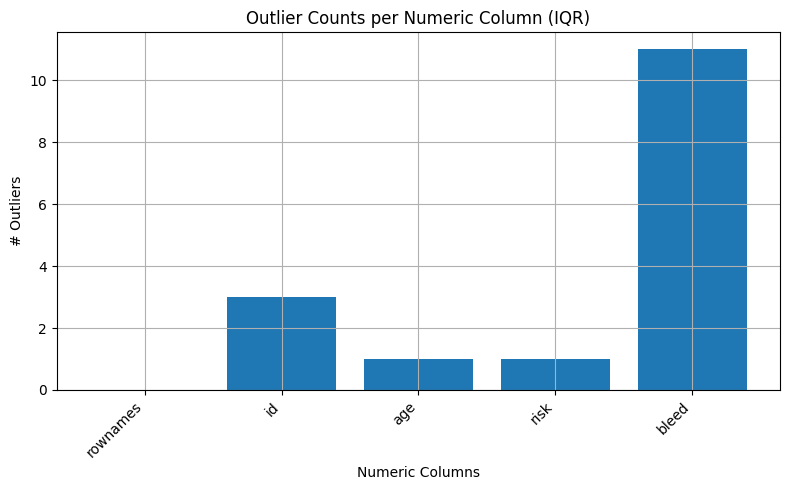

In [47]:
# 3) Data Cleaning & Handling
# =========================
section("Data Cleaning & Handling")

df_clean = df.copy()

# 3.1 Standardize column names (snake_case)
df_clean.columns = (
    df_clean.columns
        .str.strip()
        .str.replace(r"[^\w\s]", "", regex=True)
        .str.replace(r"\s+", "_", regex=True)
        .str.lower()
)

# 3.2 Coerce numeric‑like objects to numeric
for c in df_clean.columns:
    if df_clean[c].dtype == object:
        sample = df_clean[c].dropna().astype(str).str.replace(",", "").str.replace(" ", "")
        numericish = sample.str.replace(".", "", 1).str.replace("-", "", 1).str.isnumeric()
        if numericish.mean() > 0.6:
            df_clean[c] = pd.to_numeric(df_clean[c].astype(str).str.replace(",", ""), errors="coerce")

# 3.3 Parse date‑like columns (heuristic)
for c in df_clean.columns:
    if df_clean[c].dtype == object:
        try:
            parsed = pd.to_datetime(df_clean[c], errors="raise", infer_datetime_format=True)
            if parsed.notna().mean() > 0.8:
                df_clean[c] = parsed
        except Exception:
            pass

print("\nDtypes after coercion:")
display(df_clean.dtypes)

# 3.4 Missing value handling (median for numeric, mode for categorical)
num_cols = df_clean.select_dtypes(include="number").columns.tolist()
cat_cols = df_clean.select_dtypes(exclude="number").columns.tolist()

for c in num_cols:
    df_clean[c] = df_clean[c].fillna(df_clean[c].median())
for c in cat_cols:
    if df_clean[c].isna().any():
        df_clean[c] = df_clean[c].fillna(df_clean[c].mode()[0])

# 3.5 Outlier flagging (IQR) summary
outlier_summary = {}
for c in num_cols:
    Q1, Q3 = df_clean[c].quantile(0.25), df_clean[c].quantile(0.75)
    IQR = Q3 - Q1
    lo, hi = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
    outlier_summary[c] = int(((df_clean[c] < lo) | (df_clean[c] > hi)).sum())

outlier_df = pd.DataFrame({"column": list(outlier_summary.keys()), "outliers": list(outlier_summary.values())})
print("\nIQR Outlier Counts (numeric columns):")
display(outlier_df.sort_values("outliers", ascending=False).reset_index(drop=True).head(20))

plt.figure()
plt.bar(outlier_summary.keys(), outlier_summary.values())
plt.ylabel("# Outliers")
plt.xlabel("Numeric Columns")
plt.title("Outlier Counts per Numeric Column (IQR)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout(); plt.show()


1D Analysis — Univariate
Numeric summary:


,count,mean,std,min,25%,50%,75%,max
rownames,602.0,301.500000,173.926709,1.0,151.25,301.5,451.75,602.0
id,602.0,1939.425249,568.733133,1001.0,1152.25,2137.5,2288.75,4003.0
age,602.0,45.269103,13.297968,19.0,35.00,45.0,54.00,90.0
risk,602.0,2.381229,0.881269,1.0,1.50,2.5,3.00,5.5
bleed,602.0,1.981728,0.134046,1.0,2.00,2.0,2.00,2.0


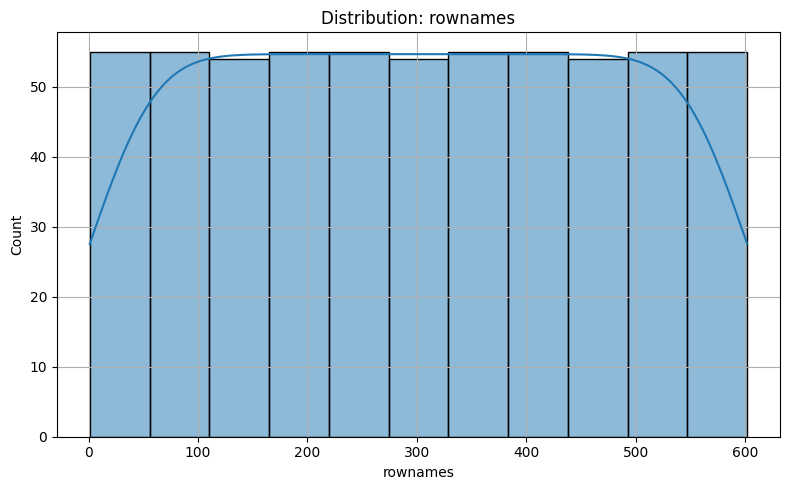

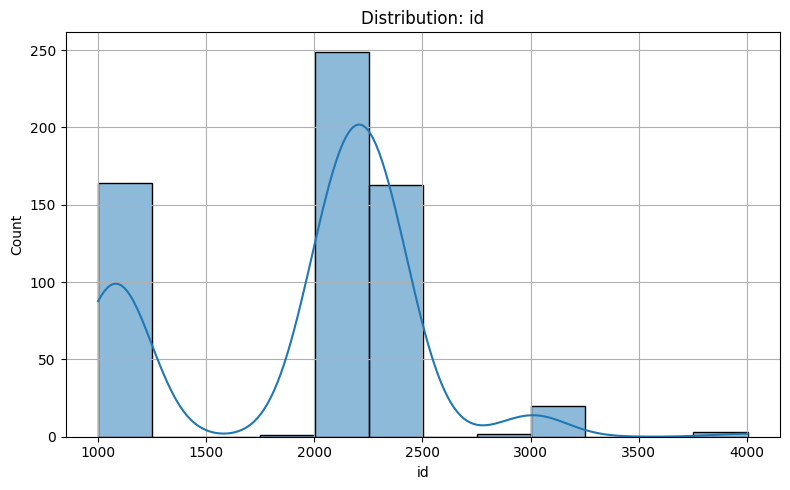

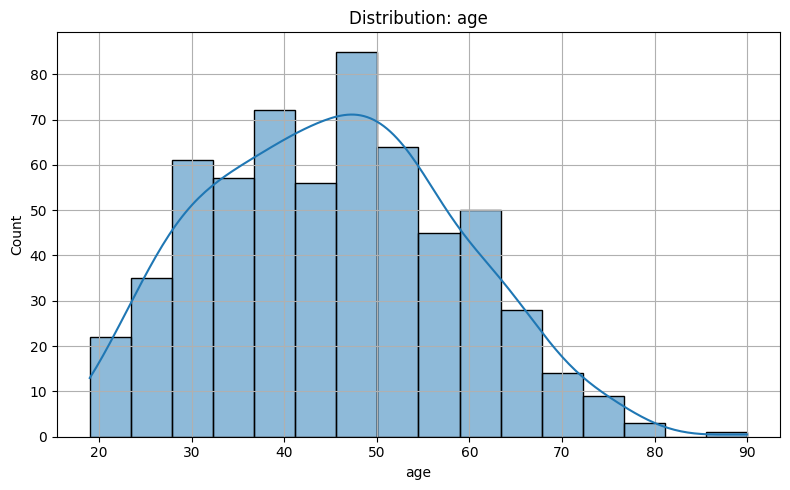

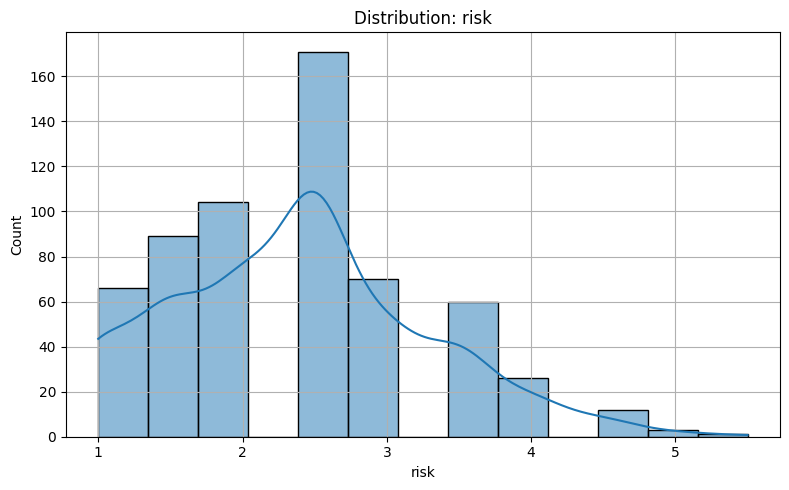

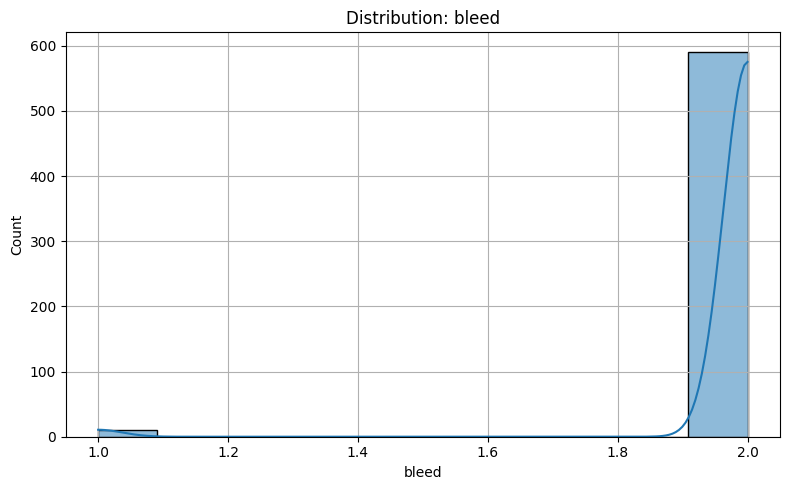

In [48]:
# 4) 1D Analysis (Univariate)
# =========================
section("1D Analysis — Univariate")

print("Numeric summary:")
display(df_clean[num_cols].describe().T)

# Histograms + KDE for first few numeric columns
for c in num_cols[:5]:
    fig, ax = plt.subplots()
    sns.histplot(df_clean[c], kde=True, ax=ax)
    ax.set_title(f"Distribution: {c}")
    plt.tight_layout(); plt.show()



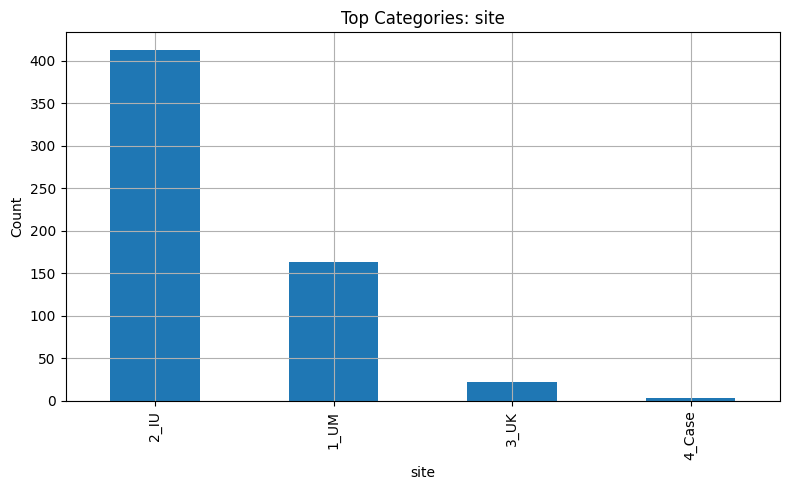

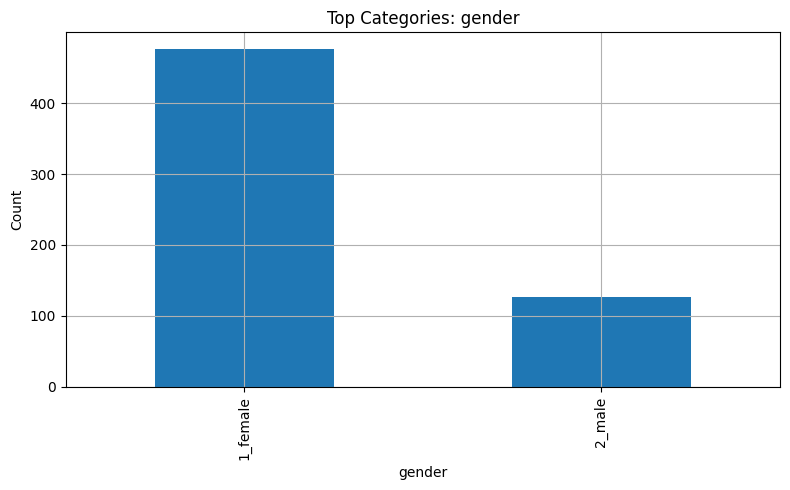

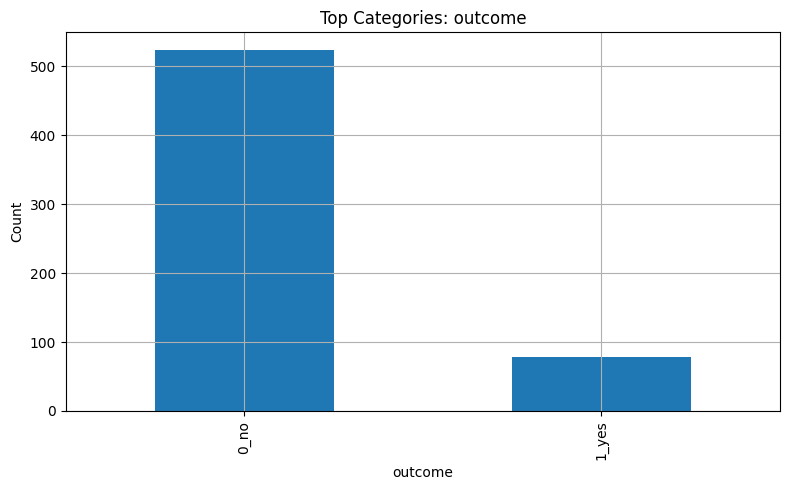

In [49]:
# Top categories for first few categorical columns
for c in cat_cols[:3]:
    fig, ax = plt.subplots()
    df_clean[c].value_counts().head(15).plot(kind="bar", ax=ax)
    ax.set_title(f"Top Categories: {c}")
    ax.set_xlabel(c); ax.set_ylabel("Count")
    plt.tight_layout(); plt.show()



2D Analysis — Bivariate


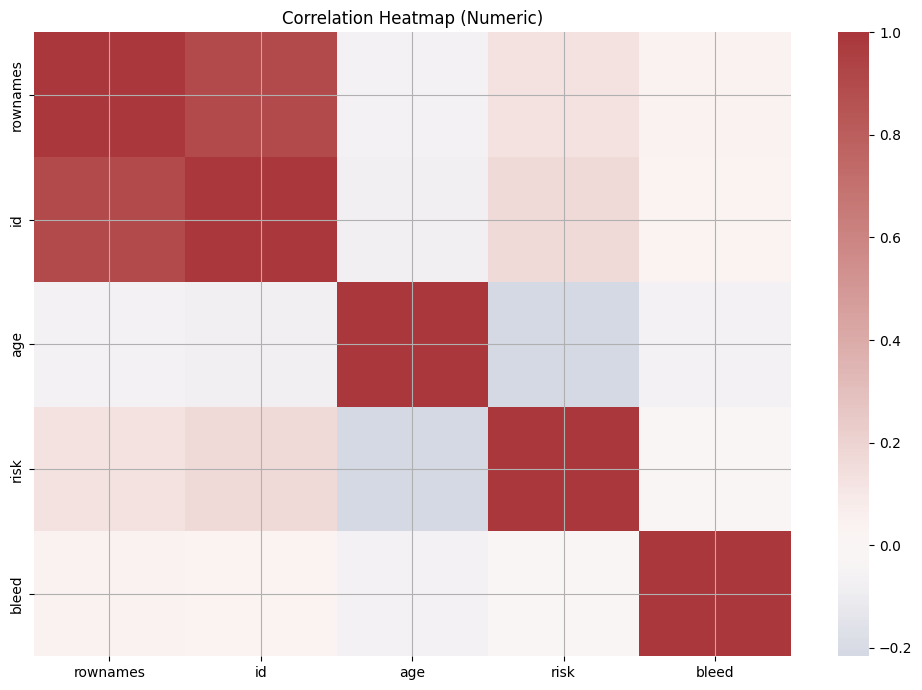

In [50]:
# 5) 2D Analysis (Bivariate)
section("2D Analysis — Bivariate")

if len(num_cols) >= 2:
    corr = df_clean[num_cols].corr()
    plt.figure(figsize=(10,7))
    sns.heatmap(corr, cmap="vlag", center=0)
    plt.title("Correlation Heatmap (Numeric)")
    plt.tight_layout(); plt.show()

Top correlated numeric pairs:
  id vs rownames — corr = 0.897


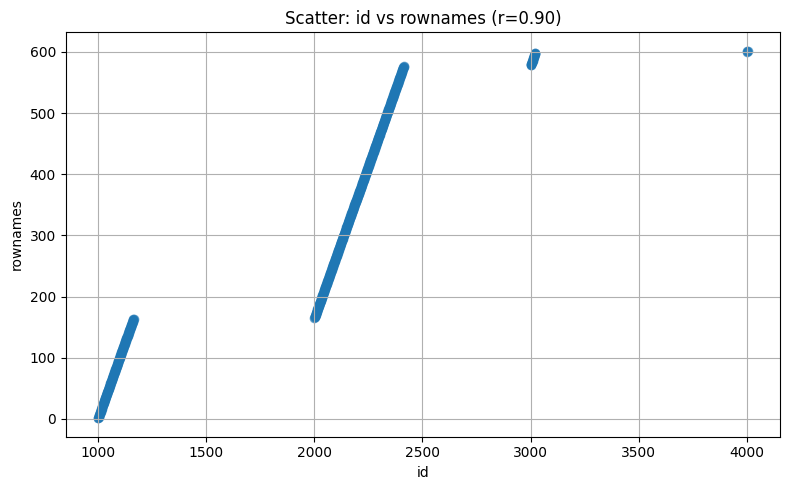

  age vs risk — corr = -0.217


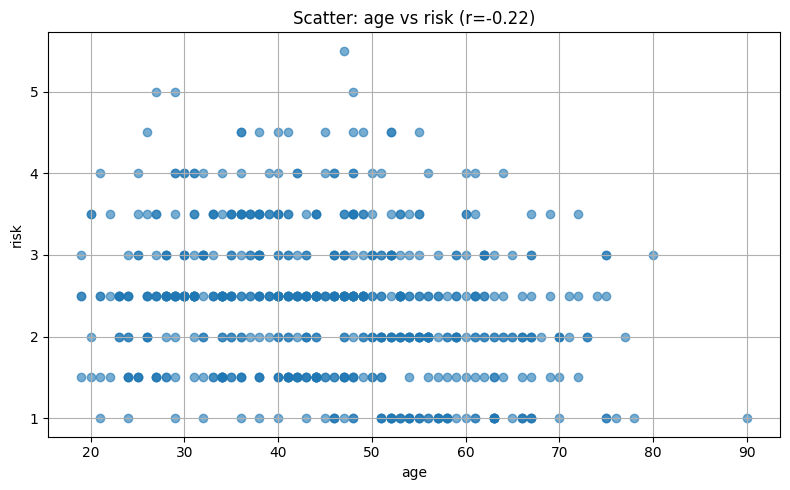

  id vs risk — corr = 0.167


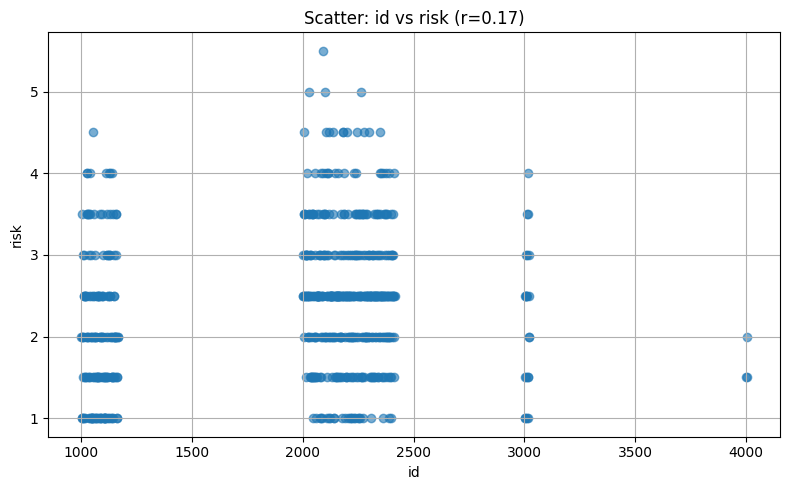

In [51]:
    # Top correlated pairs
    pairs = (corr.where(~np.eye(corr.shape[0], dtype=bool)).stack().abs().sort_values(ascending=False))
    top_pairs = [(a, b) for (a, b) in pairs.index if a < b][:3]
    print("Top correlated numeric pairs:")
    for a, b in top_pairs:
        print(f"  {a} vs {b} — corr = {corr.loc[a, b]:.3f}")
        plt.figure()
        plt.scatter(df_clean[a], df_clean[b], alpha=0.6)
        plt.title(f"Scatter: {a} vs {b} (r={corr.loc[a,b]:.2f})")
        plt.xlabel(a); plt.ylabel(b)
        plt.tight_layout(); plt.show()



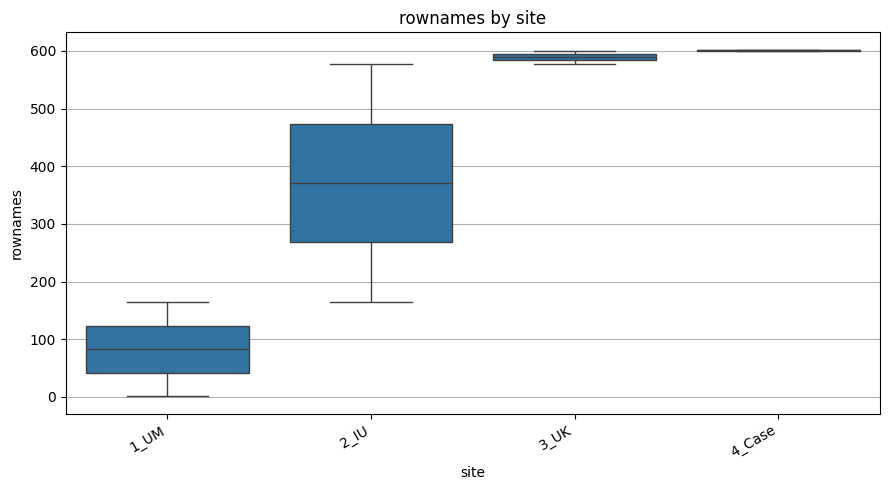

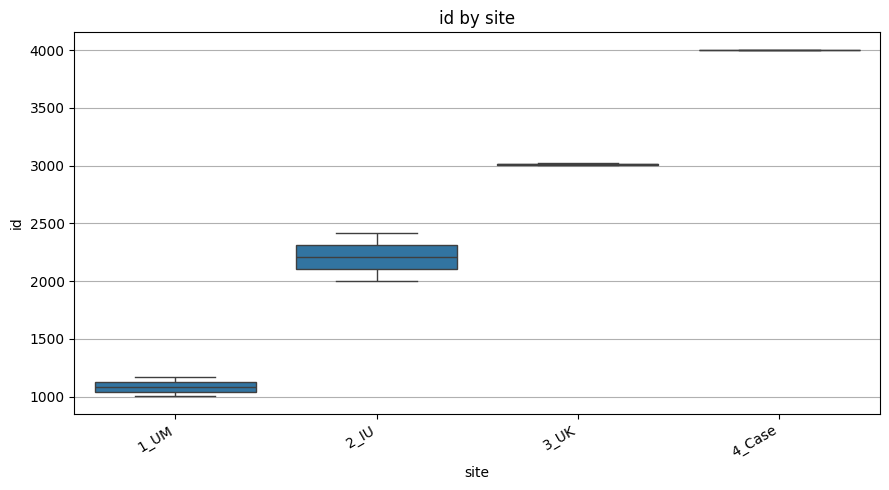

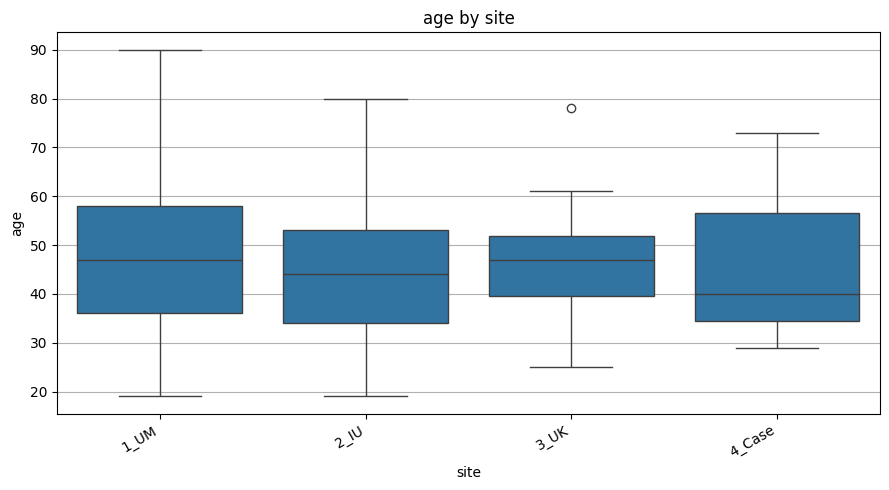

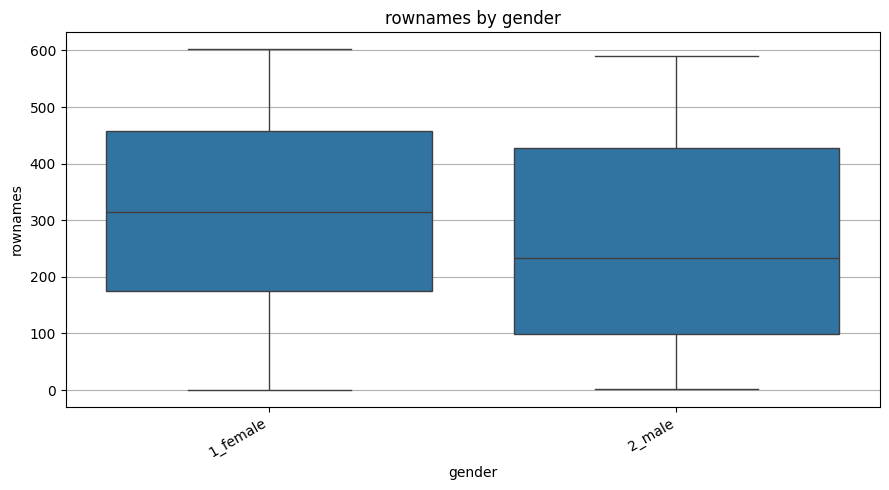

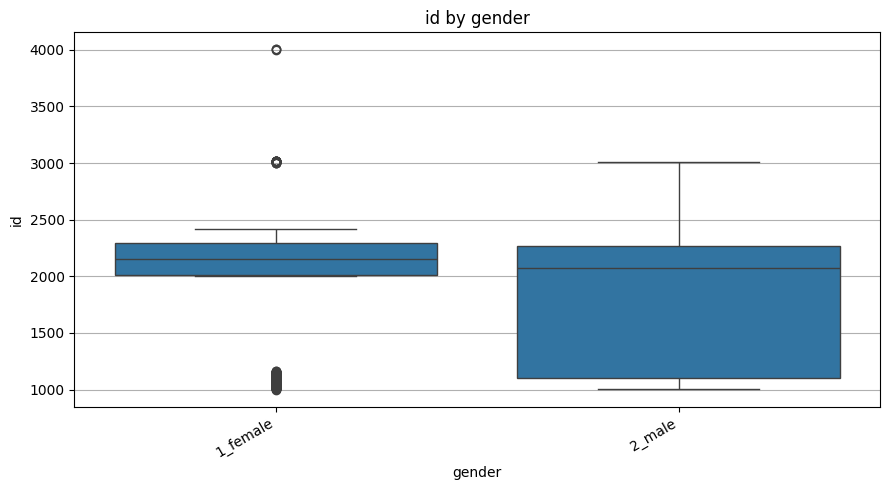

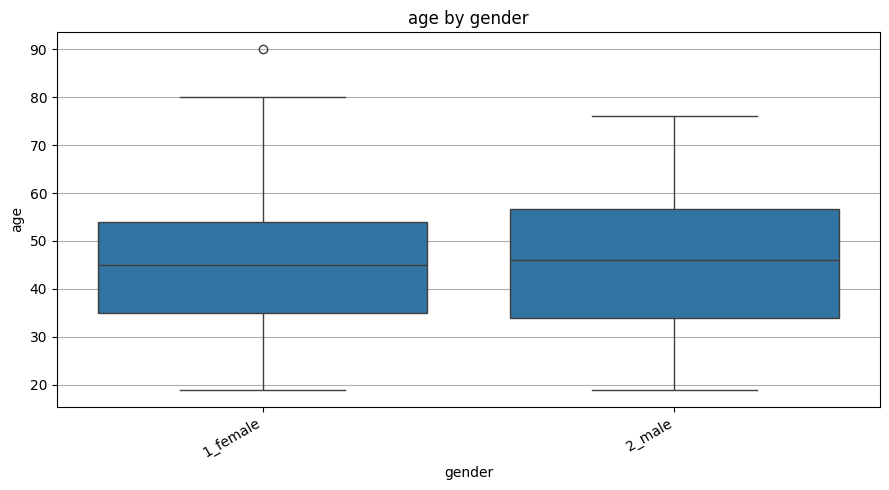

In [52]:
# Numeric vs Categorical (first 2 cats x first 3 nums)
for c in cat_cols[:2]:
    for n in num_cols[:3]:
        plt.figure(figsize=(9,5))
        sns.boxplot(x=df_clean[c], y=df_clean[n])
        plt.title(f"{n} by {c}")
        plt.xticks(rotation=30, ha="right")
        plt.tight_layout(); plt.show()

In [53]:
# Categorical vs Categorical (first two)
if len(cat_cols) >= 2:
    a, b = cat_cols[0], cat_cols[1]
    ct = pd.crosstab(df_clean[a], df_clean[b])
    print("Crosstab (first two categoricals):")
    display(ct.head())

Crosstab (first two categoricals):


gender,1_female,2_male
site,,
1_UM,110,54
2_IU,345,68
3_UK,18,4
4_Case,3,0



N‑D / Multivariate Analysis


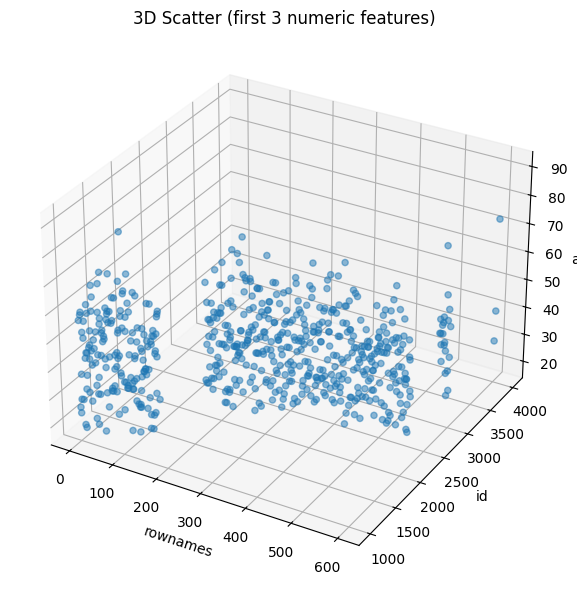

In [54]:
#6) N‑D / Multivariate Analysis
section("N‑D / Multivariate Analysis")

# 3D scatter using first three numeric columns
if len(num_cols) >= 3:
    x, y, z = num_cols[:3]
    fig = plt.figure(figsize=(7, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(df_clean[x], df_clean[y], df_clean[z], alpha=0.5)
    ax.set_xlabel(x); ax.set_ylabel(y); ax.set_zlabel(z)
    ax.set_title("3D Scatter (first 3 numeric features)")
    plt.tight_layout(); plt.show()

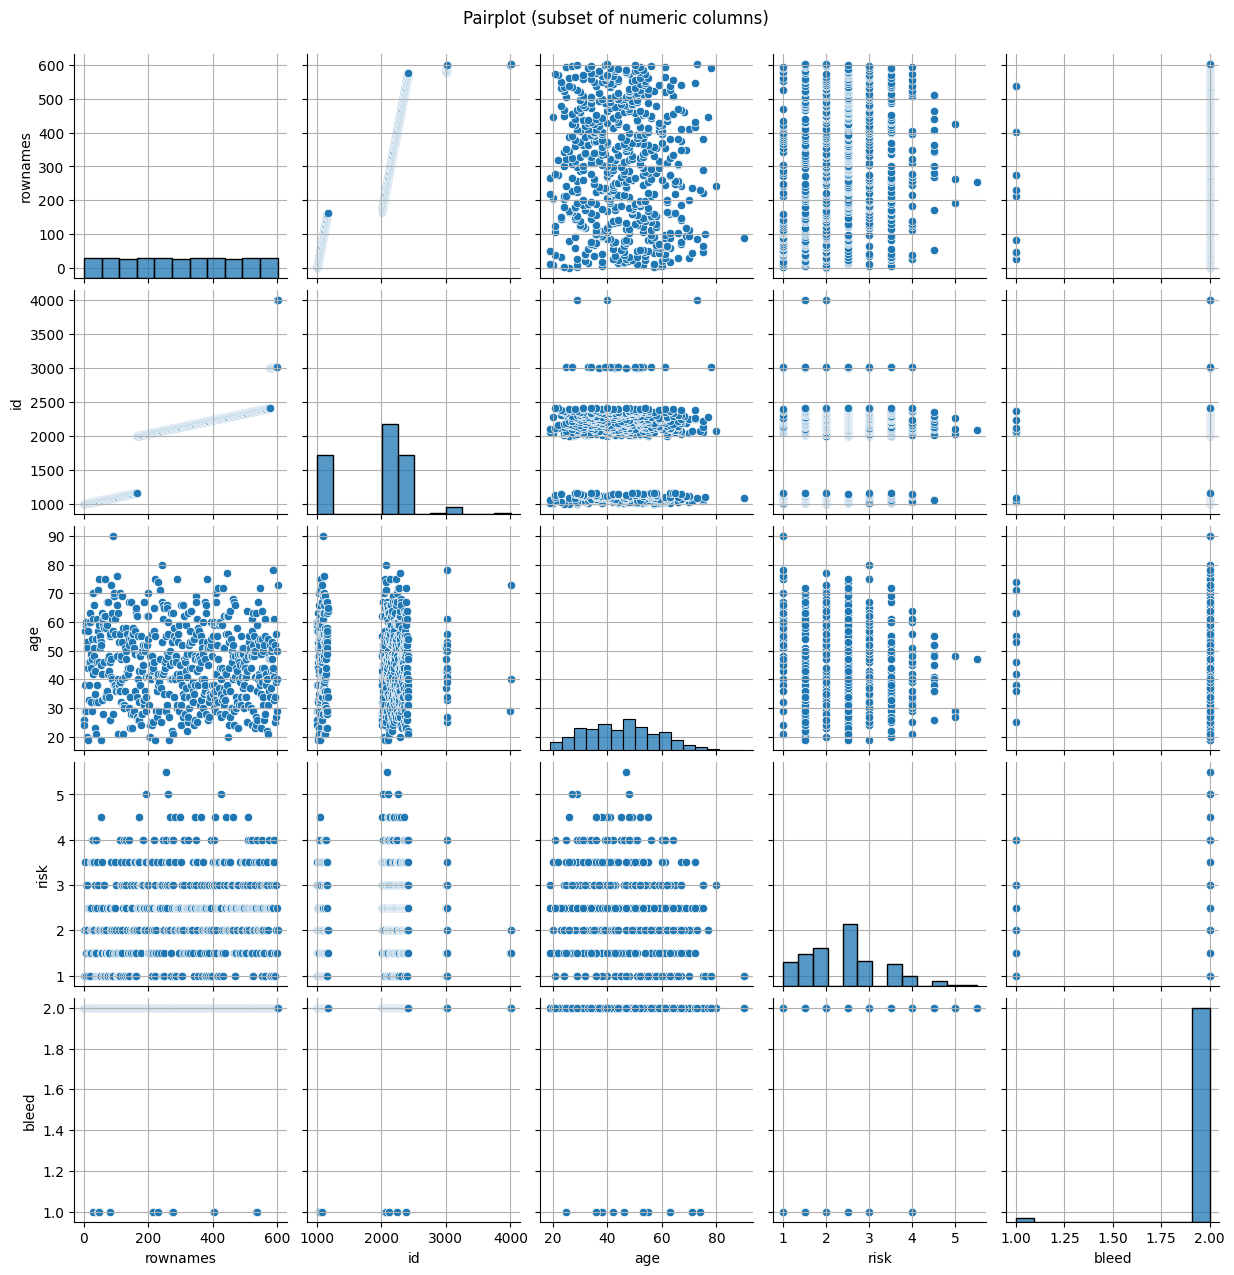

In [55]:
# Pairplot on a subset
sub_nums = num_cols[:6]
if len(sub_nums) >= 2:
    g = sns.pairplot(df_clean[sub_nums], diag_kind="hist")
    g.fig.suptitle("Pairplot (subset of numeric columns)", y=1.02)
    plt.show()

In [56]:
# 7) Time‑Series (optional if time data is present
section("Time‑Series (Optional)")

date_cols = [c for c in df_clean.columns if np.issubdtype(df_clean[c].dtype, np.datetime64)]
print("Detected datetime columns:", date_cols)
if date_cols:
    dt = date_cols[0]
    ts = df_clean.set_index(dt).sort_index()
    # Simple examples: daily counts and monthly mean of first numeric column
    print("\nDaily counts (head):")
    display(ts.resample('D').size().head(10))
    if num_cols:
        print(f"\nMonthly mean of {num_cols[0]} (head):")
        display(ts[num_cols[0]].resample('M').mean().head(10))
else:
    print("No datetime columns detected — skipping TS analysis.")


Time‑Series (Optional)
Detected datetime columns: []
No datetime columns detected — skipping TS analysis.



PCA — Dimensionality Reduction
Explained Variance (2 comps): [0.39436971 0.23157804]
Total (2D): 0.6259477447882519


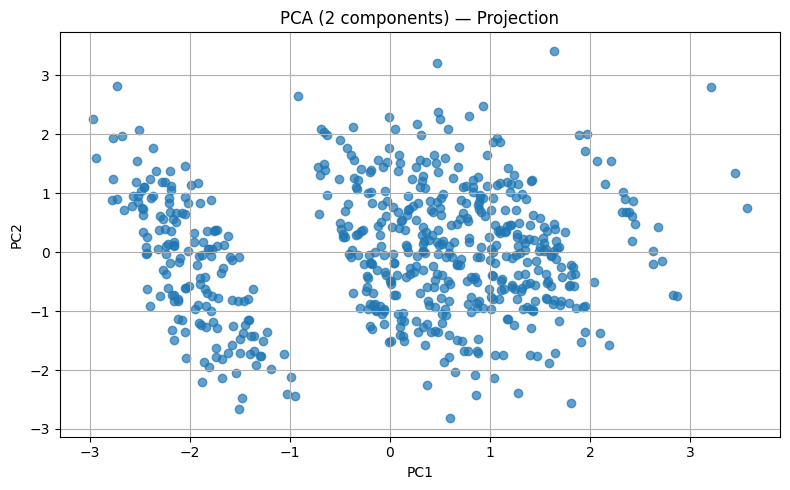

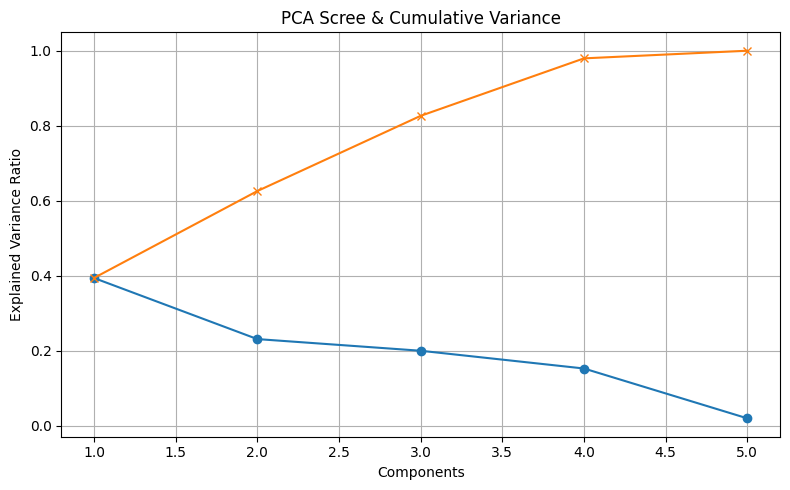

In [57]:
# 8) PCA — Dimensionality Reduction
section("PCA — Dimensionality Reduction")

if len(num_cols) >= 2:
    Xn = df_clean[num_cols].copy()
    scaler = StandardScaler()
    Xn_scaled = scaler.fit_transform(Xn)

    # 2D projection
    pca2 = PCA(n_components=2, random_state=42)
    X_pca2 = pca2.fit_transform(Xn_scaled)

    print("Explained Variance (2 comps):", pca2.explained_variance_ratio_)
    print("Total (2D):", pca2.explained_variance_ratio_.sum())

    plt.figure()
    plt.scatter(X_pca2[:, 0], X_pca2[:, 1], alpha=0.7)
    plt.xlabel("PC1"); plt.ylabel("PC2")
    plt.title("PCA (2 components) — Projection")
    plt.tight_layout(); plt.show()

      # Scree (up to 10 comps)
    n_comp = min(10, Xn.shape[1])
    pca_full = PCA(n_components=n_comp, random_state=42)
    pca_full.fit(Xn_scaled)
    evr = pca_full.explained_variance_ratio_
    plt.figure()
    plt.plot(range(1, n_comp+1), evr, marker='o')
    plt.plot(range(1, n_comp+1), np.cumsum(evr), marker='x')
    plt.xlabel("Components")
    plt.ylabel("Explained Variance Ratio")
    plt.title("PCA Scree & Cumulative Variance")
    plt.tight_layout(); plt.show()
else:
    print("Not enough numeric columns for PCA.")



Clustering — KMeans


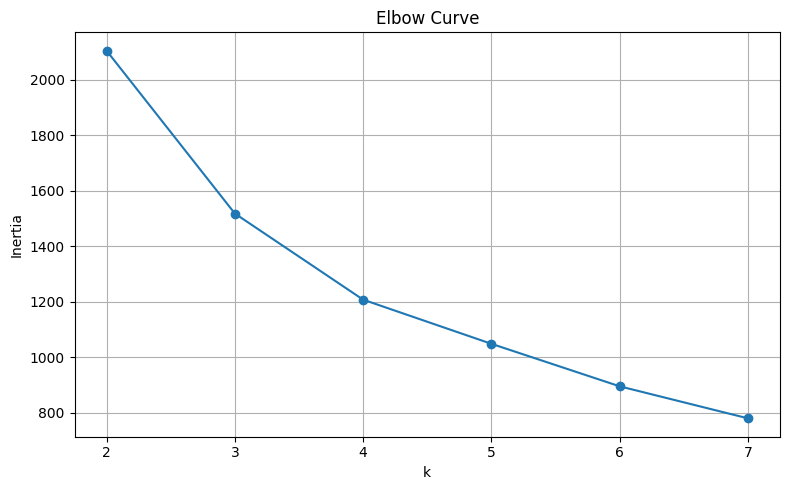

k=2  silhouette=0.376
k=3  silhouette=0.397
k=4  silhouette=0.298
k=5  silhouette=0.290


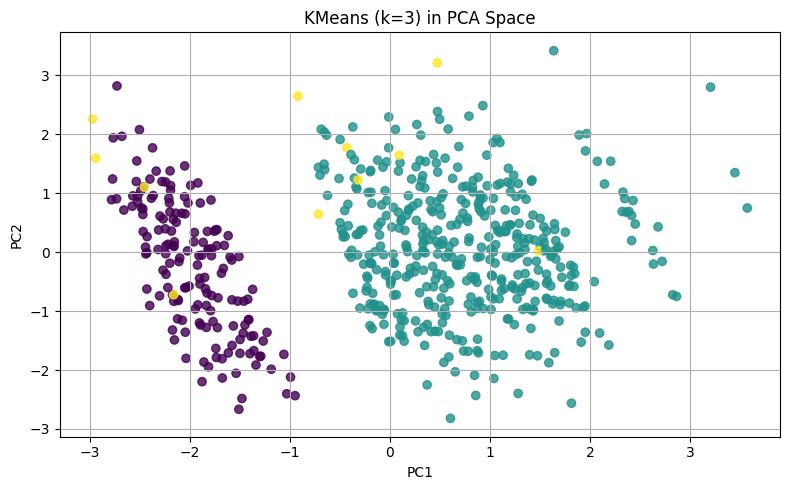

Cluster sizes (k=3):


,count
cluster_k3,
1,431
0,160
2,11


In [58]:
# 9) Clustering (KMeans) on Scaled Numerics
section("Clustering — KMeans")

if len(num_cols) >= 3:
    scaler = StandardScaler(); X_scaled = scaler.fit_transform(df_clean[num_cols])

    # Elbow
    Ks = range(2, 8)
    inertias = []
    for k in Ks:
        km = KMeans(n_clusters=k, random_state=42, n_init=10)
        km.fit(X_scaled)
        inertias.append(km.inertia_)
    plt.figure(); plt.plot(list(Ks), inertias, marker="o")
    plt.xlabel("k"); plt.ylabel("Inertia"); plt.title("Elbow Curve")
    plt.tight_layout(); plt.show()

    # Silhouette for k=2..5
    for k in range(2, 6):
        labels = KMeans(n_clusters=k, random_state=42, n_init=10).fit_predict(X_scaled)
        print(f"k={k}  silhouette={silhouette_score(X_scaled, labels):.3f}")

    # Default k=3 fit
    km3 = KMeans(n_clusters=3, random_state=42, n_init=10)
    labels3 = km3.fit_predict(X_scaled)

      # Visualize in PCA space
    pca2 = PCA(n_components=2, random_state=42)
    Xp = pca2.fit_transform(X_scaled)
    plt.figure(); plt.scatter(Xp[:,0], Xp[:,1], c=labels3, alpha=0.8)
    plt.title("KMeans (k=3) in PCA Space"); plt.xlabel("PC1"); plt.ylabel("PC2")
    plt.tight_layout(); plt.show()

    df_clean["cluster_k3"] = labels3
    print("Cluster sizes (k=3):")
    display(df_clean["cluster_k3"].value_counts())
else:
    print("Not enough numeric columns for clustering.")


Supervised Modeling — Classification / Regression
Chosen target: outcome

=== Classification Track ===

-- LogReg+PCA --
Accuracy : 0.8678
Precision: 0.8245
Recall   : 0.8678
F1       : 0.8205
CV Acc   : 0.8671


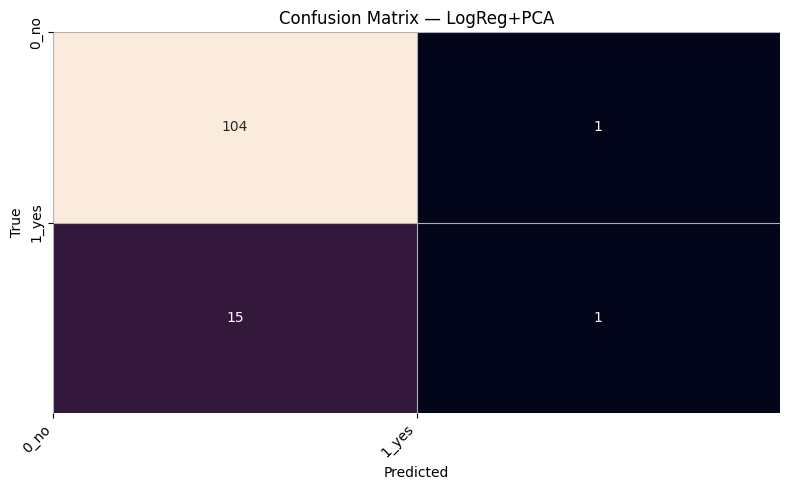

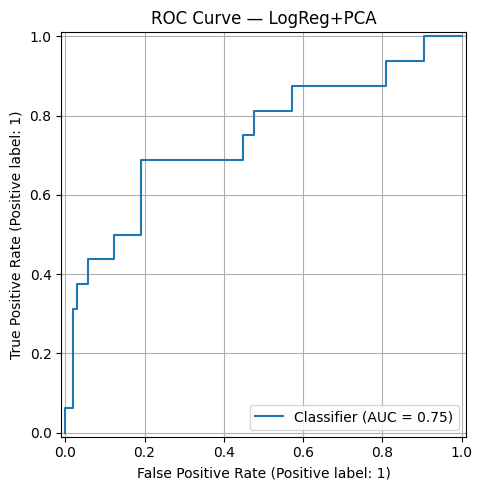

ROC‑AUC : 0.7458333333333333

-- RandomForest --
Accuracy : 0.8678
Precision: 0.8245
Recall   : 0.8678
F1       : 0.8205
CV Acc   : 0.8572


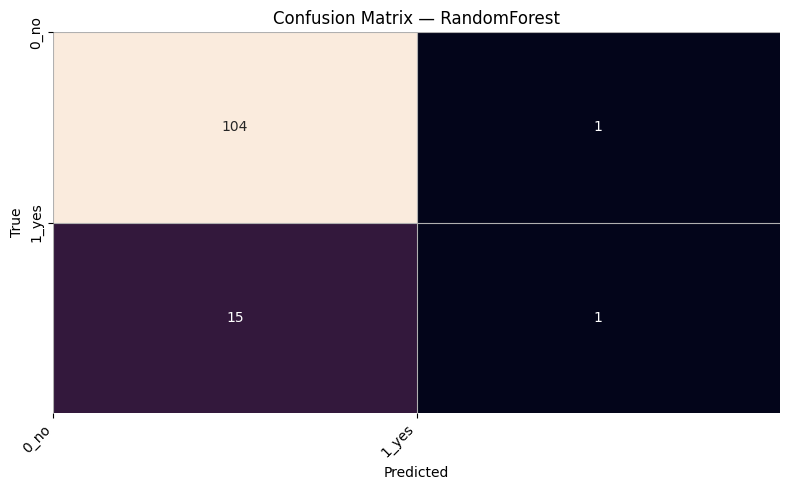

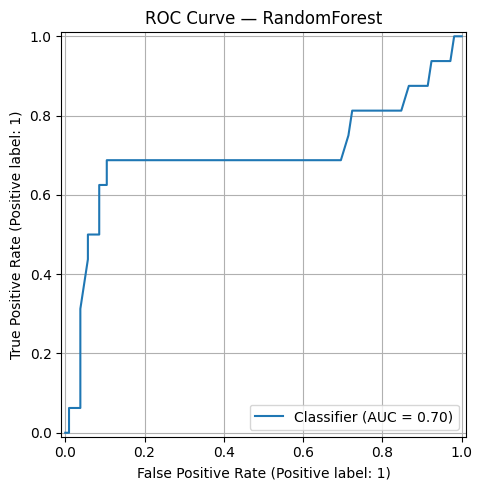

ROC‑AUC : 0.7020833333333333


In [59]:
# 10) Supervised Modeling (Classification or Regression)

section("Supervised Modeling — Classification / Regression")

# Choose modeling dataframe
df_mod = df_clean.copy()

# Drop constant/empty columns
const_cols = [c for c in df_mod.columns if df_mod[c].nunique(dropna=True) <= 1 or df_mod[c].isna().all()]
if const_cols:
    df_mod = df_mod.drop(columns=const_cols)

num_all = df_mod.select_dtypes(include="number").columns.tolist()
cat_all = df_mod.select_dtypes(exclude="number").columns.tolist()

# Heuristic target choice
preferred = ['target','label','class','outcome','y','response','Category','category','Class','is_fraud','default','churn']
target_col = None
for c in preferred:
    if c in df_mod.columns:
        target_col = c; break
if target_col is None and cat_all:
    low_card = [c for c in cat_all if 2 <= df_mod[c].nunique(dropna=True) <= 10]
    if low_card:
        # choose most balanced
        target_col = sorted(low_card, key=lambda col: df_mod[col].value_counts(normalize=True).std())[0]
if target_col is None and num_all:
    cont = [c for c in num_all if df_mod[c].nunique(dropna=True) > 15]
    if cont:
        target_col = sorted(cont, key=lambda c: (df_mod[c].isna().mean(), -df_mod[c].std()))[0]

if target_col is None:
    raise ValueError("Could not infer a target column; set target_col manually.")

print(f"Chosen target: {target_col}")

y = df_mod[target_col]
X = df_mod.drop(columns=[target_col])

# ColumnTransformer (robust to string categories)
try:
    ohe = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
except TypeError:

    ohe = OneHotEncoder(handle_unknown="ignore", sparse=False)

num_feat = [c for c in X.columns if np.issubdtype(X[c].dtype, np.number)]
cat_feat = [c for c in X.columns if c not in num_feat]

num_pre = Pipeline([
    ("impute", SimpleImputer(strategy="median")),
    ("scale", StandardScaler())
])
cat_pre = Pipeline([
    ("impute", SimpleImputer(strategy="most_frequent")),
    ("onehot", ohe)
])

pre = ColumnTransformer([
    ("num", num_pre, num_feat),
    ("cat", cat_pre, cat_feat)
])

is_classification = (y.dtype == 'object') or str(y.dtype).startswith('category') or (y.nunique() <= 10)

if is_classification:
    print("\n=== Classification Track ===")
    y_cls = y.astype('category')
    X_train, X_test, y_train, y_test = train_test_split(X, y_cls, test_size=0.2, random_state=42, stratify=y_cls)

    pipe_lr = Pipeline([
        ("pre", pre),
        ("pca", PCA(n_components=0.95, random_state=42)),
        ("model", LogisticRegression(max_iter=2000))
    ])
    pipe_rf = Pipeline([
        ("pre", pre),
        ("model", RandomForestClassifier(n_estimators=300, random_state=42))
    ])

    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    for name, model in [("LogReg+PCA", pipe_lr), ("RandomForest", pipe_rf)]:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        acc  = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred, average="weighted", zero_division=0)
        rec  = recall_score(y_test, y_pred, average="weighted", zero_division=0)
        f1   = f1_score(y_test, y_pred, average="weighted", zero_division=0)
        cv_acc = cross_val_score(model, X, y_cls, cv=cv, scoring="accuracy").mean()

        print(f"\n-- {name} --")
        print(f"Accuracy : {acc:.4f}")
        print(f"Precision: {prec:.4f}")
        print(f"Recall   : {rec:.4f}")
        print(f"F1       : {f1:.4f}")
        print(f"CV Acc   : {cv_acc:.4f}")

        cm = confusion_matrix(y_test, y_pred, labels=y_cls.cat.categories)
        plt.figure(); sns.heatmap(cm, annot=True, fmt="d", cbar=False)
        plt.title(f"Confusion Matrix — {name}")
        plt.xlabel("Predicted"); plt.ylabel("True")
        plt.xticks(ticks=range(len(y_cls.cat.categories)), labels=y_cls.cat.categories, rotation=45, ha="right")
        plt.yticks(ticks=range(len(y_cls.cat.categories)), labels=y_cls.cat.categories)
        plt.tight_layout(); plt.show()

        if y_cls.nunique() == 2:
            try:
                y_prob = model.predict_proba(X_test)[:, 1]
                RocCurveDisplay.from_predictions((y_test == y_cls.cat.categories[1]).astype(int), y_prob)
                plt.title(f"ROC Curve — {name}")
                plt.tight_layout(); plt.show()
                print("ROC‑AUC :", roc_auc_score((y_test == y_cls.cat.categories[1]).astype(int), y_prob))
            except Exception as e:
                print("ROC plotting skipped:", e)

else:
    print("\n=== Regression Track ===")
    y_reg = y.astype(float)
    X_train, X_test, y_train, y_test = train_test_split(X, y_reg, test_size=0.2, random_state=42)

    pipe_lin = Pipeline([
        ("pre", pre),
        ("pca", PCA(n_components=0.95, random_state=42)),
        ("model", LinearRegression())
    ])
    pipe_rf = Pipeline([
        ("pre", pre),
        ("model", RandomForestRegressor(n_estimators=400, random_state=42))
    ])

    cv = KFold(n_splits=5, shuffle=True, random_state=42)

    def eval_reg(name, model):
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test, y_pred)
        cv_r2 = cross_val_score(model, X, y_reg, cv=cv, scoring="r2").mean()

        print(f"\n-- {name} --")
        print(f"RMSE   : {rmse:.4f}")
        print(f"R²     : {r2:.4f}")
        print(f"CV R²  : {cv_r2:.4f}")

        plt.figure(); plt.scatter(y_test, y_pred, alpha=0.6)
        plt.xlabel("True"); plt.ylabel("Predicted")
        plt.title(f"Predicted vs True — {name}")
        lims = [min(y_test.min(), y_pred.min()), max(y_test.max(), y_pred.max())]
        plt.plot(lims, lims)
        plt.tight_layout(); plt.show()

    eval_reg("LinearReg+PCA", pipe_lin)
    eval_reg("RandomForest", pipe_rf)

In [60]:
# 11) Final Summary

section("Summary & Key Takeaways")
summary_text = (
    "• Robust cleaning: standardized names, numeric/date coercion, and imputation.\n"
    "• Outlier overview via IQR per numeric column.\n"
    "• 1D/2D/N‑D visuals: histograms, heatmap, pairplot, 3D scatter, boxplots.\n"
    "• Optional time‑series aggregations when a datetime column exists.\n"
    "• PCA for variance insight + 2D projection (with scree and cumulative plots).\n"
    "• KMeans clustering with elbow + silhouette; clusters visualized in PCA space.\n"
    "• Supervised modeling: auto‑detect target; classification (LogReg+PCA, RF) or\n"
    "  regression (LinearReg+PCA, RF) with CV metrics and clear plots.\n"
)
print(summary_text)


Summary & Key Takeaways
• Robust cleaning: standardized names, numeric/date coercion, and imputation.
• Outlier overview via IQR per numeric column.
• 1D/2D/N‑D visuals: histograms, heatmap, pairplot, 3D scatter, boxplots.
• Optional time‑series aggregations when a datetime column exists.
• PCA for variance insight + 2D projection (with scree and cumulative plots).
• KMeans clustering with elbow + silhouette; clusters visualized in PCA space.
• Supervised modeling: auto‑detect target; classification (LogReg+PCA, RF) or
  regression (LinearReg+PCA, RF) with CV metrics and clear plots.

